In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.signal import firwin, lfilter

# Cargar la señal desde el archivo señal_filtros.txt
data = np.loadtxt(r"C:\Users\MATEO\Desktop\LAB-BIOSE-ALES\senal_filtros.txt")

# Extraer el canal 1 de la señal
canal_1 = data[:, 0]

# Verificar la forma de la señal cargada
print("Forma de la señal cargada:", canal_1.shape)

Forma de la señal cargada: (60000,)


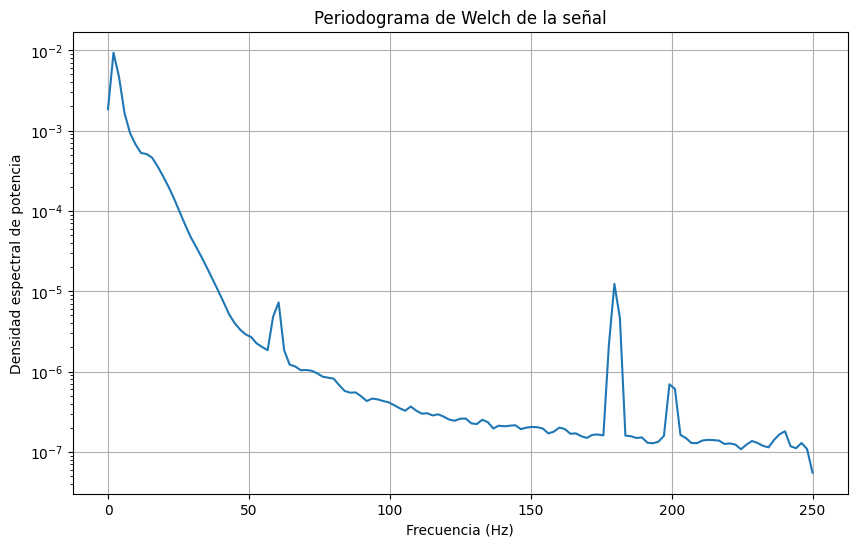

In [10]:
# Definir la frecuencia de muestreo (500 Hz según tu descripción)
fs = 500

# Calcular el periodograma de Welch
frequencies, power_spectrum = welch(canal_1, fs=fs)

# Graficar el periodograma de Welch
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power_spectrum)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch de la señal')
plt.grid(True)
plt.show()

La DSP de una señal sin ruido eléctrico es típicamente suave y continua. Si el periodograma de Welch presenta picos bruscos o irregularidades, esto puede ser un indicio de la presencia de ruido eléctrico.

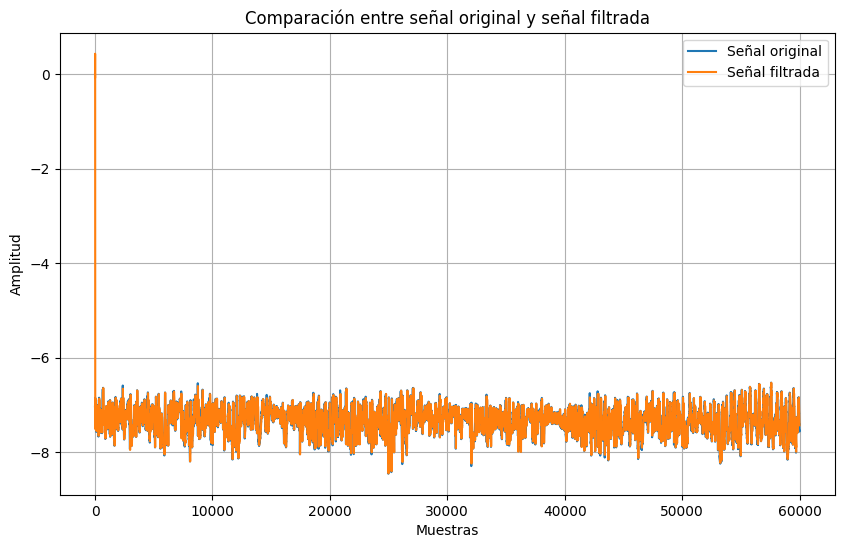

In [11]:
# Parámetros del filtro FIR
Fc_noise = 50  # Frecuencia de corte para eliminar ruido
order = 30  # Orden del filtro

# Diseñar el filtro FIR para eliminar ruido
h_noise_removal = firwin(order+1, Fc_noise / (fs / 2))

# Aplicar el filtro FIR a la señal
canal_1_filtered = lfilter(h_noise_removal, 1, canal_1)

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(canal_1, label='Señal original')
plt.plot(canal_1_filtered, label='Señal filtrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Comparación entre señal original y señal filtrada')
plt.grid(True)
plt.show()

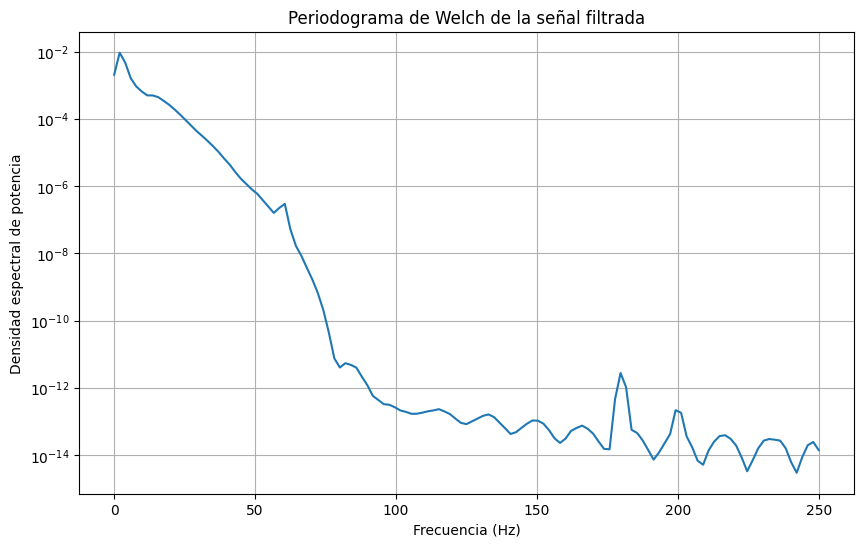

In [12]:
# Calcular el periodograma de Welch de la señal filtrada
frequencies_filtered, power_spectrum_filtered = welch(canal_1_filtered, fs=fs)

# Graficar el periodograma de Welch de la señal filtrada
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies_filtered, power_spectrum_filtered)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch de la señal filtrada')
plt.grid(True)
plt.show()

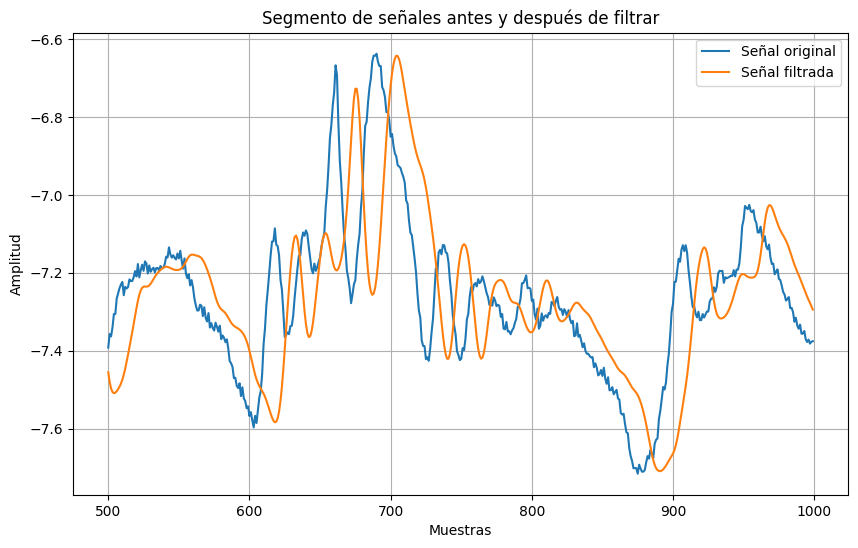

In [13]:
# Definir el intervalo de muestras a graficar (por ejemplo, de la muestra 500 a la 1000)
inicio_segmento = 500
fin_segmento = 1000

# Graficar el segmento de las señales antes y después de filtrar
plt.figure(figsize=(10, 6))
plt.plot(np.arange(inicio_segmento, fin_segmento), canal_1[inicio_segmento:fin_segmento], label='Señal original')
plt.plot(np.arange(inicio_segmento, fin_segmento), canal_1_filtered[inicio_segmento:fin_segmento], label='Señal filtrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Segmento de señales antes y después de filtrar')
plt.grid(True)
plt.show()